<a id="2.1"></a>
## About This Dataset
***

Now let's go through the features and describe a little:
***
**Categorical:**
- **Nominal**
> - **division**: 1= male, 2=female
> - **stage**: 0 = roster (all athletes who signed up), 1 = WoD 1 of that year, etc
> - **District**: a string descaribe the district the house is located
> - **Ward**: a string describe the ward the house is located
> - **Housing_type**: a string describe the type of house including byroad, street house, villa, townhouse
> - **Legal_documents**: a string describe the status of legal documents including available, on waiting, others
- **Ordinal**
> - **No_room**: a string describe the number of bedroom in the house
> - **No_floor**: a string describe the house's floor quantity
***
**Numeric:**
- **Continuous**
- **Discrete**
>  - **score**: expressed in reps or seconds
>  - **Length**: a string describe the length of the house's area in meter
>  - **Width**: a string describe the width of the house's area in meter
>  - **Price**: a string describe the cost in million VND of each meter square
***
**Date/time:**
- **Date**(Nominal variable): a string describe the date the house is upload on alonhadat.com.vn

In [15]:
# Install a conda package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install missingno
!{sys.executable} -m pip install statsmodels
!{sys.executable} -m pip install wordcloud


# work with data in tabular representation
from datetime import time
import pandas as pd
# round the data in the correlation matrix
import numpy as np
import os


# Modules for data visualization
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

from wordcloud import WordCloud

pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)

plt.rcParams['figure.figsize'] = [6, 6]

# Ensure that our plots are shown and embedded within the Jupyter notebook itself. Without this command, sometimes plots may show up in pop-up windows
%matplotlib inline

# overwrite the style of all the matplotlib graphs
sns.set()

# ignore DeprecationWarning Error Messages
import warnings
warnings.filterwarnings('ignore')

In [16]:
# check the version of the packages
print("Numpy version: ", np.__version__)
print("Pandas version: ",pd.__version__)
! python --version

Numpy version:  1.22.3
Pandas version:  1.4.3
Python 3.10.4


In [17]:
# set the general path of the external data
external_data_path = os.path.join(os.path.pardir,'data','interim')

# set the path for specific dataset from external dataset
df = os.path.join(external_data_path, 'cleaned_data.csv')

In [18]:
# import dataset
df = pd.read_csv(df, delimiter=',', skipinitialspace = True)
# print dataset info
print("The shape and data type of the ORGINAL data:", str(df.info()))
# print first 5 rows
df.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250717 entries, 0 to 250716
Data columns (total 30 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   athlete_id  250717 non-null  float64
 1   name        250561 non-null  object 
 2   region      250013 non-null  object 
 3   team        154322 non-null  object 
 4   affiliate   240727 non-null  object 
 5   gender      250561 non-null  object 
 6   age         250561 non-null  float64
 7   height      118702 non-null  float64
 8   weight      189719 non-null  float64
 9   fran        41480 non-null   float64
 10  helen       22348 non-null   float64
 11  grace       31058 non-null   float64
 12  filthy50    14320 non-null   float64
 13  fgonebad    21792 non-null   float64
 14  run400      16223 non-null   float64
 15  run5k       26880 non-null   float64
 16  candj       79656 non-null   float64
 17  snatch      72985 non-null   float64
 18  deadlift    86317 non-null   float64
 19  ba

,athlete_id,name,region,team,affiliate,gender,age,height,weight,fran,helen,grace,filthy50,fgonebad,run400,run5k,candj,snatch,deadlift,backsq,pullups,eat,train,background,experience,schedule,howlong,division,rank,score
0,2554.0,Pj Ablang,South West,Double Edge,Double Edge CrossFit,Male,24.0,70.0,166.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,220.0,NaN,400.0,305.0,NaN,NaN,I workout mostly at a CrossFit Affiliate|I hav...,I played youth or high school level sports|I r...,I began CrossFit with a coach (e.g. at an affi...,I do multiple workouts in a day 2x a week|,4+ years|,male,44119.0,771.0
1,5164.0,Abo Brandon,Southern California,LAX CrossFit,LAX CrossFit,Male,40.0,67.0,NaN,211.0,645.0,300.0,NaN,196.0,NaN,NaN,245.0,200.0,375.0,325.0,25.0,I eat 1-3 full cheat meals per week|,I workout mostly at a CrossFit Affiliate|I hav...,I played youth or high school level sports|,I began CrossFit by trying it alone (without a...,I usually only do 1 workout a day|,4+ years|,male,35928.0,713.0
2,6610.0,Anthony Abeel,South Central,Get Lifted,Get Lifted CrossFit,Male,21.0,72.0,175.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,I eat quality foods but don't measure the amou...,I workout mostly at a CrossFit Affiliate|I hav...,I have no athletic background besides CrossFit|,I began CrossFit with a coach (e.g. at an affi...,I do multiple workouts in a day 3+ times a wee...,2-4 years|,male,2318.0,445.0
3,13285.0,Kipp Abbott,Central East,Fit Club,CrossFit 614,Male,43.0,71.0,185.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,I eat quality foods but don't measure the amount|,I workout mostly at a CrossFit Affiliate|,I have no athletic background besides CrossFit|,I began CrossFit with a coach (e.g. at an affi...,I usually only do 1 workout a day|I typically ...,2-4 years|,male,31721.0,686.0
4,13576.0,Mikko Aaltonen,Europe,Reebok CrossFit 33100,Reebok CrossFit 33100,Male,37.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,male,73417.0,523.0


In [19]:
# see the static of all numerical column
df.describe().T

,count,mean,std,min,25%,50%,75%,max
athlete_id,250717.0,366678.170830,1.876171e+05,82.0,216602.0,387296.0,536306.0,6.330830e+05
age,250561.0,32.281652,7.660026e+00,15.0,27.0,31.0,37.0,5.400000e+01
height,118702.0,138.717949,2.434767e+04,0.0,66.0,69.0,71.0,8.388607e+06
weight,189719.0,170.325002,4.097401e+01,1.0,145.0,170.0,191.0,9.008000e+03
fran,41480.0,1208.207932,8.323205e+04,1.0,211.0,286.0,390.0,8.388607e+06
helen,22348.0,1408.042867,7.942971e+04,1.0,524.0,594.0,694.0,8.388607e+06
grace,31058.0,680.974950,5.602194e+04,1.0,147.0,190.0,257.0,8.388607e+06
filthy50,14320.0,2300.568087,7.040031e+04,1.0,1302.0,1541.0,1800.0,8.388607e+06
fgonebad,21792.0,1526.835765,9.888266e+04,0.0,242.0,296.0,338.0,8.388607e+06
run400,16223.0,672.607533,6.591329e+04,1.0,62.0,71.0,84.0,8.388607e+06


In [21]:
def visualize_word(col_name):
    text = df[col_name].values
    wordcloud = WordCloud().generate(str(text))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

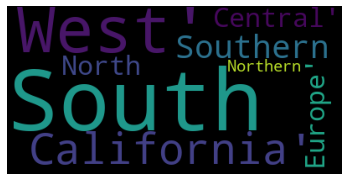

In [22]:
visualize_word('region')

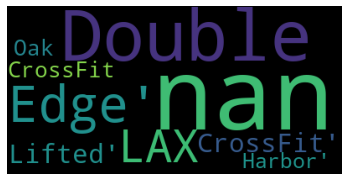

In [24]:
visualize_word('team')

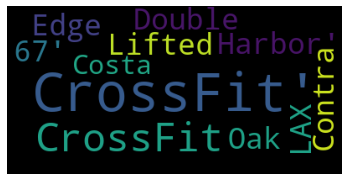

In [25]:
visualize_word('affiliate')